## <font color=red>Литература</font>

1. Лекции «Алгоритмы: построение, анализ и реализация на языке программирования Си» - Ворожцов А.В., Винокуров Н.А.. Выложена в канале **#edu_materials**


 # <font color=blue>Алгоритмы сортировки, не использующие сравнение</font>
 
 До сих пор мы рассматривали алгоритмы сортировки, основанные на операции сравнения элементов массива друг с другом. Лучшая возможная эффективность таких алгоритмов - $O(n \cdot \log n)$. Этот результат можно получить следующим образом.
 
1. Если длина массива $A$ равна $n$, то всего существует $n!$ перестановок элементов $A$.

- В процессе сортировки мы определяем, в каком из $n!$ возможных состояний был массив $A$ до сортировки.

- Если выполнить $k$ сравнений элементов массива, то можно получить $2^k$ различных результатов.

- Чтобы с помощью последовательности сравнений элементов $A$ понять, в каком массив находился состоянии, количество возможных результатов должно быть не меньше числа состояний.

- Получаем $2^k \ge n!$. Если применить формулу Стирлинга $n! \ge \sqrt{2 \pi n} \left(\frac{n}{e}\right)^n e^{\frac{1}{12 n + 1}}$ (с [уточнением Робинса](https://www.jstor.org/stable/2308012?origin=crossref&seq=1#page_scan_tab_contents)), получаем $k \ge \log_2 \sqrt{2 \pi} + \frac{1}{2} \log_2 n + n \cdot \left( \log_2 n - \frac{1}{\ln 2} \right) + \frac{1}{(12 n + 1) \ln 2} \ge n \cdot \left( \log_2 n - \frac{1}{\ln 2} \right)$ 


**Однако, если есть дополнительная информация о ключах элементов сортируемого массива $A$, эффективность алгоритма сортировки можно улучшить.**

## <font color=green>Сортировка подсчетом (counting sort)</font>

Если известно, что число различных элементов в массиве мало, то лучшим решением становится сортировка подсчетом. 

1. Определить число элементов каждого вида в сортируемом массиве.

- Определить порядок видов элементов.

- Записать элементы массива в правильном порядке.

Если $n$ - размер массива, а $k$ - число видов элементов, то сортировка может быть выполнена в $2$ прохода по массиву. 1 проход требуется для подсчета и еще один для записи элементов в правильном порядке.

### Упражнение 1. Сортировка подсчетом списка целых чисел

Отсортируйте по возрастанию список целых чисел.

In [8]:
import random
L = [random.randint(1, 5) for _ in range(100)]

def count_sort(L):
    
    # число элементов каждого вида
    C = [0] * 5
    for elem in L:
        C[elem - 1] += 1
    
    # записать числа обратно в L
    index = 0
    for elem, n in enumerate(C):
        L[index: index + n] = [elem + 1] * n
        index += n

In [9]:
print(L)
count_sort(L)
print(L)

[5, 2, 4, 1, 3, 1, 1, 3, 5, 1, 4, 2, 5, 5, 5, 1, 5, 2, 2, 3, 2, 3, 1, 2, 2, 2, 1, 2, 4, 4, 4, 2, 1, 2, 2, 5, 1, 4, 1, 3, 4, 5, 4, 4, 5, 1, 1, 2, 1, 1, 2, 3, 2, 2, 1, 1, 1, 2, 3, 2, 1, 3, 3, 4, 1, 5, 2, 4, 1, 3, 3, 3, 5, 5, 1, 2, 2, 5, 4, 3, 2, 1, 2, 3, 1, 2, 4, 4, 5, 5, 3, 1, 5, 1, 3, 1, 5, 2, 4, 5]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [15]:
d = dict(a=1, b=2, c=3, w = 4, h = 6)
sorted(d.items())

[('a', 1), ('b', 2), ('c', 3), ('h', 6), ('w', 4)]

###  Упражнение 2. Сортировка подсчетом списка слов

Список `L` содежит строки, состоящие из строчных букв. Отсортируйте строки по их первой букве. Равные элементы не должны переставляться между собой. Объем используемой памяти не должно зависеть от размера списка.

In [24]:
sorted(d.keys())

['a', 'b', 'c', 'h', 'w']

In [1]:
import random
import string
L = [''.join(random.sample(string.ascii_lowercase, random.randint(4, 10))) for _ in range(300)]

In [36]:
def count_sort_strings(L):
    
    # Строки, сгруппированные по первой букве
    D = {}
    for elem in L:
        first_letter = elem[0]
        if first_letter in D.keys():
            D[first_letter].append(elem)
        else:
            D[first_letter] = [elem]
    
    # записать строки обратно в L
    sorted_keys = sorted(D.keys())
    index = 0
    for first_letter in sorted_keys:
        n = len(D[first_letter])
        L[index: index + n] = D[first_letter]
        index += n

In [37]:
# print(L)
L_sorted = sorted(L, key = lambda x: x[0])
print(L == L_sorted)
count_sort_strings(L)
print(L == L_sorted)

True
True


## <font color=green>Блочная соритровка (bucket sort)</font>

Блочная сортировка может быть успешно применена, если известно, как распределены ключи. Если ключи равномерно распределены на интервале $\left[0, 1\right)$, то интервал можно разбить на $k$ равных промежутков (блоков или корзин), чтобы распределить по ним элементы сортируемого массива. Далее элементы в каждой из корзин сортируются с помощью другого алгоритма, чаще всего с помощью сортировки вставками. В конце корзины объединяются.

Блочную сортировку можно рассматривать, как обобщение сортировки подсчетом.

### Упражнение 3. Блочная сортировка

Отсортируйте с помощью блочной сортировки список `L`. Определите оптимальное значение числа блоков для сортировки списка из $10^4$ элементов.

In [14]:
import timeit
import random
L = [random.uniform(0, 1) for _ in range(10**4)]

In [15]:
def insert_sort(A):
    
    for i in range(1, len(A)):
        # Первые i элементов уже отсортированы. Возьмем (i+1)-й элемент
        j = i
        while (j >= 1) and (A[j] < A[j - 1]):
            A[j - 1], A[j] = A[j], A[j - 1]
            j = j - 1


def bucket_sort(L, k):
    
    buckets = [[] for i in range(k)]
    
    # Разделение на корзины
    for elem in L:
        i_bucket = int(elem // (1 / k))
        buckets[i_bucket].append(elem)

    # Сортировка вставками каждой корзины
    for b in buckets:
        insert_sort(b)
        
    # Слияние отсортированных корзин
    index = 0
    for b in buckets:
        L[index: index + len(b)] = b
        index += len(b)

In [16]:
L_sorted = sorted(L)
print(L_sorted == L)

bucket_sort(L, 10)
print(L_sorted == L)

False
True


In [13]:
%%time

L = [random.uniform(0, 1) for _ in range(10**4)]
bucket_sort(L, 10)

Wall time: 1.19 s


In [32]:
import time
N_buckets = [int(2*i) for i in range(1, 30)]
times = []

for k in N_buckets:
    start_time = time.time()
    L = [random.uniform(0, 1) for _ in range(10**4)]
    bucket_sort(L, 10)
    finish_time = time.time()
    times.append(finish_time - start_time)

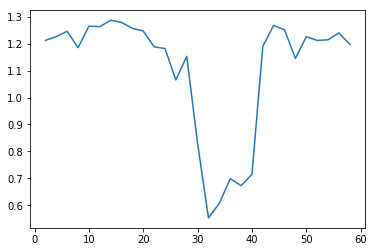

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(N_buckets, times);

## <font color=green>Поразрядная сортировка (radix sort)</font>

Поразрядная сортировка - это развитие идей сортировки подсчетом и быстрой сортировки. Пусть ключи, по которым осуществляется сортировка - целые числа. Тогда можно разделить массив на корзины по значениям старших разрядов ключей. Затем каждую из получившихся корзин разделить уже по значениям второго по старшинству разряда и так далее. Подход очень похож на быструю сортировку, однако на практике почти всегда под корзины выделяется дополнительная память, что обеспечивает сортировке стабильность.

Поразрядная сортировка есть в двух вариантах: по более значимым цифрам (most significant digit или MSD) и по менее значимым цифрам (least significant digit или LSD). Сверху описан алгоритм MSD.

Алгоритм LSD устроен следующим образом.

1. Выполняется **устойчивая** (т.е. равные элементы не переставляются) сортировка подсчетом по младшему разряду.

2. Корзины соединяются (конкатенируются) в один список.

3. Повторяется пункт 1, но сортировка выполняется по следующему по старшинству разряду.

### Пример 1. LSD сортировка 20-ти трехзначных чисел

```
117 821 112 951 340 832 417 392 210 252 939 962 937 715 481 132 192 641 791 988  # исходный массив
340 210 821 951 481 641 791 112 832 392 252 962 132 192 715 117 417 937 988 939  # упорядочен младший разряд
210 112 715 117 417 821 832 132 937 939 340 641 951 252 962 481 988 791 392 192  # упорядочены 0-й и 1-й разряды
112 117 132 192 210 252 340 392 417 481 641 715 791 821 832 937 939 951 962 988
```

***
Время поразрядной сортировки оценивается в $O\left(w \cdot (n + d)\right)$, где $w$ - максимальная длина ключа.

| <font size=3>Сложность</font> | <font size=3>Лучший случай</font> |<font size=3>Средняя эффективность</font>|<font size=3>Худший случай</font>|  
| :---: | :---: | :---: | :---: |
| <font size=3>Время</font> | <font size=3> $O\left(w \cdot (n + d)\right)$ </font> | <font size=3> $O\left(w \cdot (n + d)\right)$ </font> | <font size=3> $O\left(w \cdot (n + d)\right)$ </font> |
| <font size=3>Память MSD</font> | <font size=3>$O(n + d \cdot w)$</font> | <font size=3>$O(n + d \cdot w)$</font> | <font size=3>$O(n + d \cdot w)$</font> |
| <font size=3>Память LSD</font> | <font size=3>$O(n + d)$</font> | <font size=3>$O(n + d)$</font> | <font size=3>$O(n + d)$</font> |

### Упражнение 4. LSD sorting

Реализуйте функцию `lsd_sort()` для поразрядной сортировки.

In [7]:
import random
L = list(range(150)) + list(range(100, 250))
random.shuffle(L)

In [14]:
# Count_sort, который принимает функцию, в качестве ключа

def count_sort(L, key = lambda x: x):
    
    D = {}
    for elem in L:
        value = key(elem)
        if value in D.keys():
            D[value].append(elem)
        else:
            D[value] = [elem]
    
    sorted_keys = sorted(D.keys())
    index = 0
    for value in sorted_keys:
        n = len(D[value])
        L[index: index + n] = D[value]
        index += n

In [12]:
# Число разрядов
n = len(str(max(L)))

for i in range(n):
    # функция, по которой будем сортировать
    f = lambda x: (x / 10 ** i) % 10
    count_sort(L, key = f)

In [13]:
L

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 100,
 101,
 101,
 102,
 102,
 103,
 103,
 104,
 104,
 105,
 105,
 106,
 106,
 107,
 107,
 108,
 108,
 109,
 109,
 110,
 110,
 111,
 111,
 112,
 112,
 113,
 113,
 114,
 114,
 115,
 115,
 116,
 116,
 117,
 117,
 118,
 118,
 119,
 119,
 120,
 120,
 121,
 121,
 122,
 122,
 123,
 123,
 124,
 124,
 125,
 125,
 126,
 126,
 127,
 127,
 128,
 128,
 129,
 129,
 130,
 130,
 131,
 131,
 132,
 132,
 133,
 133,
 134,
 134,
 135,
 135,
 136,
 136,
 137,
 137,
 138,
 138,
 139,
 139,
 140,
 140,
 141,
 141,
 142,


### <font color=red>Замечание</font>

Этот способ теоретически может оказаться быстрее алгоритма быстрой сортировки, однако в практике такие случаи встречаются нечасто. Чтобы поразрядная сортировка была эффективной требуется, чтобы ключи были равномерно распределены по цифрам в каждом из своих разрядов. Например, требуется отсортировать массив целых чисел 110, 110, 111, 112, 115, 111, 119, 118, 119, 117, 120, 116, 116, 112, 113, 114, 113, 117. В данном случае ключи распределены по цифрам в нулевом разряде следующим образом:
```
'0': 3
'1': 2
'2': 2
'3': 2
'4': 1
'5': 1
'6': 2
'7': 2
'8': 1
'9': 2
```
В первом разряде используются только два значения из 10-ти возможных: `'1'` и `'2'`, причем последнее встречается лишь один раз, а во втором разряде используется только значение `'1'`. Получается, что при использовании поразрядной сортировки на двух разрядах алгоритм будет "простаивать".

# <font color=blue>Свойства и классификация алгоритмов сортировки</font>

## <font color=green>Устойчивость</font>

Алгоритмы сортировки дялятся на устойчивые и неустойчивые. Устойчивые алгоритмы сохраняют порядок элементов с одинаковыми ключами.

### Пример 2. Устойчивость

Пусть требуется упорядочить слова в списке `["Bob", "Ann", "Angie"]` по первой букве. Ключи слов `"Ann"` и `"Angie"` совпадают и равны `"A"`. Если сортировка устойчива, то гарантируется, что в упорядоченном списке `"Ann"` будет стоять перед `"Angie"`.

### Упражнение 5. Устойчивость сортировки выбором

Почему сортировка выбором в варианте, когда выполняется перестановка элементов, не является устойчивой? Приведите пример. Реализуйте устойчивый вариант сортировки выбором. Для этого нужно вставлять минимальный элемент перед неупорядоченной частью массива.

### Упражнение 6. Устойчивость сортировки слиянием

Какая неточность в реализации сортировки слиянием приведет к тому, что она станет неустойчивой?

### Упражнение 7. Устойчивость быстрой сортировки

Почему быстрая сортировка неустойчива? Приведите пример. Реализуйте устойчивый вариант быстрой сортировки. Для этого нужно закрепить за каждым элементом массива его индекс в исходном массиве и в случае, когда ключи равны, большим будет считаться элемент с большим индексом.

**Вариант быстрой сортировки, в котором ключ расширяется засчет индекса элемента в исходном массиве требует дополнительно $O(n)$ памяти.**

## <font color=green>Естественность поведения</font>

Алгоритм принято называть естественным, если он эффективно работает на упорядоченных и частично упорядоченных массивах. Алгоритмы сортировки пузырьком и вставками эффективны на частично упорядоченных массивах, в то время как поведение быстрой сортировки и сортировки слиянием не естественно.

## <font color=green>Внутренняя и внешняя сортировка</font>

Сортировка называется **внутренней**, если массив целиком помещается в оперативной памяти и возможен доступ к произвольному элементу массива. Сортировка называется **внешней**, если данные находятся на носителе большого объема с последовательным доступом к памяти. На этом занятии рассматриваются только алгоритмы внутренней сортировки.

### Упражнение 8. Рекламная акция

В сети магазинов "Н-Аудио" проводится рекламная акция. Каждый второй товар – бесплатно. Естественно, кассирам дано указание пробивать товары в таком порядке, чтобы магазин потерял как можно меньше денег.

По списку товаров определите максимальную сумму в чеке.

**Вход**: натуральное число товаров (N < 1000) и далее N натуральных чисел – цены товаров.

**Выход**: одно число – максимальная сумма чека.

<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none;mso-border-alt:solid windowtext .5pt;
 mso-yfti-tbllook:480;mso-padding-alt:0cm 5.4pt 0cm 5.4pt'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes'>
  <td width=121 valign=top style='width:90.45pt;border:solid windowtext 1.0pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal>Вход</p>
  </td>
  <td width=132 valign=top style='width:99.25pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal>Выход</p>
  </td>
  <td width=385 valign=top style='width:288.85pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal>Комментарий</p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1;mso-yfti-lastrow:yes'>
  <td width=121 valign=top style='width:90.45pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal>5 2 1 10 50 10</p>
  </td>
  <td width=132 valign=top style='width:99.25pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal>70</p>
  </td>
  <td width=385 valign=top style='width:288.85pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal>Возможен такой порядок: 10 2 50 1 10</p>
  </td>
 </tr>
</table>


### Упражнение 9. Ровно K обменов

Даны два числа N и К. Вывести перестановку из N чисел (N чисел от 1 до N без повторений) такую чтобы сортировка пузырьком по возрастанию на соответствующем массиве сделала ровно K обменов. Если возможных ответов несколько – выведите любой.

**Вход**: натуральное число N (N < 100) и целое  неотрицательное К. Гарантируется, что для всех наборов тестовых данных решение существует.

**Выход**: ответ на задачу.

<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none;mso-border-alt:solid windowtext .5pt;
 mso-yfti-tbllook:480;mso-padding-alt:0cm 5.4pt 0cm 5.4pt'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes'>
  <td width=177 valign=top style='width:133.0pt;border:solid windowtext 1.0pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal>Вход</p>
  </td>
  <td width=118 valign=top style='width:88.4pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal>Выход</p>
  </td>
  <td width=343 valign=top style='width:257.15pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal>Комментарий</p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1;mso-yfti-lastrow:yes'>
  <td width=177 valign=top style='width:133.0pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal>5 3</p>
  </td>
  <td width=118 valign=top style='width:88.4pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal>3 1 2 5 4</p>
  </td>
  <td width=343 valign=top style='width:257.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal>В процессе сортировки массива 3 1 2 5 4 будут совершены
  обмены: 1<span style='font-family:Symbol;mso-ascii-font-family:"Times New Roman";
  mso-hansi-font-family:"Times New Roman";mso-char-type:symbol;mso-symbol-font-family:
  Symbol'><span style='mso-char-type:symbol;mso-symbol-font-family:Symbol'>«</span></span>3
  3<span style='font-family:Symbol;mso-ascii-font-family:"Times New Roman";
  mso-hansi-font-family:"Times New Roman";mso-char-type:symbol;mso-symbol-font-family:
  Symbol'><span style='mso-char-type:symbol;mso-symbol-font-family:Symbol'>«</span></span>2
  и 5<span style='font-family:Symbol;mso-ascii-font-family:"Times New Roman";
  mso-hansi-font-family:"Times New Roman";mso-char-type:symbol;mso-symbol-font-family:
  Symbol'><span style='mso-char-type:symbol;mso-symbol-font-family:Symbol'>«</span></span>4.
  Возможны и другие варианты ответа.</p>
  </td>
 </tr>
</table>


### Упражнение 10. Лента Мебиуса

Предположим, что имеется некоторый кусок ленты, разделенный на кадры. Кадры занумерованы с двух сторон. Полоска ленты склеена в лист Мебиуса. Необходимо составить алгоритм упорядочения этой последовательности, предположив, что соседние кадры можно переставлять, (естественно, в упорядоченной последовательности будет один "скачок" от минимального элемента к максимальному). Следует учесть, что при перестановке кадров переставляются числа с обеих сторон кадров. 

Числа на противоположных сторонах кадра могут не совпадать. Всегда ли возможно такое упорядочение?